# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')

## Below we examine if the distribution of the data is Normal.
## We do this by pulling a normally distributed data set with similar mean and standard deviation and see how closely our data mimics this

In [2]:
# Q1 
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
temp = df['temperature']

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
np.sqrt(130)

11.401754250991379

### Data distribution

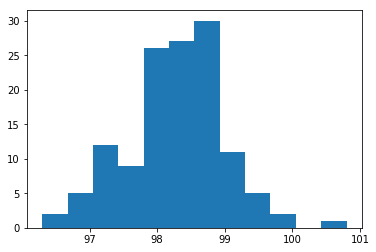

In [7]:
plt.hist(temp,bins=12)
plt.show()

In [8]:
mean = temp.mean()
std = temp.std()

### Random data set generator

In [9]:
samples = np.random.normal(mean,std,10000)

In [10]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [126]:
x, y = ecdf(temp)

In [127]:
x_theor , y_theor = ecdf(samples)

### We can see below that our data closely mimics curve line of a normally distributed sample. So we can assume normal distribution

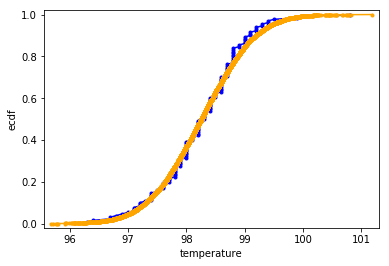

In [129]:
_ = plt.plot(x,y,marker='.',color='blue')
_ = plt.plot(x_theor, y_theor, marker='.',color='orange')
_ = plt.xlabel('temperature')
_ = plt.ylabel('ecdf')
plt.margins(.02)
plt.show()

In [ ]:
# Q1 reponse: graphing the ECDF function shows that the observed data is quite similar to the theoretical normal distribution established by sampling a large number of events. 
## follow up question: How do I get the actual p value from the ECDF ?

# Q3 : Generating a bootstrap sample for temperature 

In [14]:
print(mean)

98.24923076923078


In [90]:
# continued..
# Generating many samples of the mean of a bootstrap sample
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

In [80]:
# continued..
# Generating many samples of the mean of a bootstrap sample
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [81]:
bs_replicates = draw_bs_reps(temp,np.mean,100000)

In [102]:
bootstrap_replicate_1d(temp,np.mean)

98.299230769230761

In [99]:
bs_replicates > mean

array([False, False, False, ...,  True,  True, False], dtype=bool)

In [83]:
p_mean = np.sum(bs_replicates > mean) / len(bs_replicates)
print(p_mean)

0.49827


## P Value above says that about 49.5% of the replicates fall to the left of the mean of temp. So the temperatures are quite similar with the normal distribution data

### based on below P value, from this data, it is impossible for the mean of body temps to have actually been 98.6

In [84]:
p_2 = np.sum(bs_replicates < 98.6) / len(bs_replicates)
print(p_2)

1.0


## Q4 : Drawing conclusions based on low number of samples also shows null in likelihood of getting a temp mean of 98.6

In [105]:
bs_replicates_3 = draw_bs_reps(temp,np.mean,10)

In [107]:
p_3 = np.sum(bs_replicates_3 > 98.6)/10
print(p_3)

0.0


# Question 6 analysis

In [108]:
female_data = df[(df.gender=='F')]['temperature']
male_data = df[(df.gender=='M')]['temperature']

In [109]:
print('female mean:',np.mean(female_data))
print('male mean:',np.mean(male_data))
print('female std:',np.std(female_data))
print('male std:',np.std(male_data))

female mean: 98.39384615384613
male mean: 98.1046153846154
female std: 0.7377464486428966
male std: 0.6933598841828696


In [110]:
print('male mean:',np.mean(male_data))

male mean: 98.1046153846154


In [119]:
x_f , y_f = ecdf(draw_bs_reps(female_data,np.mean,10000))
x_m , y_m = ecdf(draw_bs_reps(male_data,np.mean,10000))
x , y = ecdf(draw_bs_reps(temp,np.mean,10000))

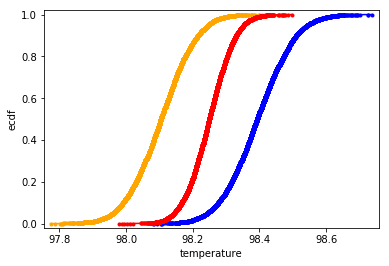

In [120]:
_ = plt.plot(x_f , y_f ,marker='.',color='blue')
_ = plt.plot(x_m , y_m, marker='.',color='orange')
_ = plt.plot(x,y,marker='.',color='red')
_ = plt.xlabel('temperature')
_ = plt.ylabel('ecdf')
plt.margins(.02)
plt.show()

## Q6 above graph shows that the mean temp of female cohort runs consistently hotter than that of men's and that the average of men and womens' also runs colder, meaning mens' temps are consistently lower in average.

In [121]:
reps_female = draw_bs_reps(female_data,np.mean,10000)
reps_male = draw_bs_reps(male_data,np.mean,10000)

In [122]:
p_female = np.sum(reps_female >= reps_male)/10000
print(p_female)

0.9896


### Above P value of 98.9% states that in 98.9% of our sampling, women temperature were higher than that of mens'